In [0]:
!pip install pycaret

In [0]:
from pycaret import classification
import pandas as pd


Problem Statement : We have a bank dataset with features like customer age, experience, income, education, and whether he/she has a credit card or not. The bank wants to build a machine learning model that will help them identify the potential customers who have a higher probability of purchasing a personal loan.

In [5]:
data_classification = pd.read_csv('/content/loan_train_data.csv')
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [6]:
data_classification.shape

(4000, 14)

In [8]:
data_classification['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [10]:
# setup the environment 
classification_setup = classification.setup(data= data_classification, target='Personal Loan')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3575
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(4000, 14)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
#Model training
# build the decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810
1,0.9429,0.8526,0.7407,0.6897,0.7143,0.6826
2,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633
3,0.9643,0.8975,0.8148,0.8148,0.8148,0.7951
4,0.9750,0.8869,0.7778,0.9545,0.8571,0.8436
5,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810
6,0.9821,0.9405,0.8889,0.9231,0.9057,0.8958
7,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541
8,0.9964,0.9815,0.9630,1.0000,0.9811,0.9792
9,0.9857,0.9403,0.8846,0.9583,0.9200,0.9121


In [15]:
# build the xgboost model
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9821,0.9982,0.9630,0.8667,0.9123,0.9024
1,0.9714,0.9931,0.7407,0.9524,0.8333,0.8180
2,0.9893,0.9987,0.8889,1.0000,0.9412,0.9353
3,0.9821,0.9969,0.8889,0.9231,0.9057,0.8958
4,0.9821,0.9952,0.8148,1.0000,0.8980,0.8883
5,0.9929,0.9999,0.9630,0.9630,0.9630,0.9590
6,0.9893,0.9982,0.9259,0.9615,0.9434,0.9375
7,0.9857,0.9985,0.8519,1.0000,0.9200,0.9122
8,0.9893,0.9878,0.9259,0.9615,0.9434,0.9375
9,0.9892,0.9997,0.9615,0.9259,0.9434,0.9375


In [16]:
#Hyperparameter tuning
classification_dt_tuned = classification.tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9929,0.9960,1.0000,0.9310,0.9643,0.9603
1,0.9750,0.8699,0.7407,1.0000,0.8511,0.8377
2,0.9893,0.9791,0.9259,0.9615,0.9434,0.9375
3,0.9714,0.9177,0.8519,0.8519,0.8519,0.8360
4,0.9679,0.8995,0.8148,0.8462,0.8302,0.8124
5,0.9750,0.9765,0.8889,0.8571,0.8727,0.8589
6,0.9786,0.9716,0.9630,0.8387,0.8966,0.8847
7,0.9821,0.9603,0.8519,0.9583,0.9020,0.8922
8,0.9929,0.9628,0.9259,1.0000,0.9615,0.9576
9,0.9785,0.9188,0.8462,0.9167,0.8800,0.8682


In [17]:
classification_xgb_tuned = classification.tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9964,0.9994,1.0000,0.9643,0.9818,0.9798
1,0.9714,0.9886,0.7407,0.9524,0.8333,0.8180
2,0.9857,0.9972,0.8889,0.9600,0.9231,0.9152
3,0.9857,0.9968,0.8889,0.9600,0.9231,0.9152
4,0.9786,0.9912,0.8148,0.9565,0.8800,0.8683
5,0.9857,0.9982,0.9259,0.9259,0.9259,0.9180
6,0.9893,0.9977,0.9259,0.9615,0.9434,0.9375
7,0.9821,0.9991,0.8148,1.0000,0.8980,0.8883
8,0.9893,0.9939,0.9259,0.9615,0.9434,0.9375
9,0.9964,0.9992,0.9615,1.0000,0.9804,0.9784


In [19]:
classification_xgb_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=40,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3575,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [20]:
classification_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3575,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [21]:
classification_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3575, splitter='best')

In [22]:
classification_dt_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3575, splitter='best')

In [23]:

# ensemble boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9929,0.9795,0.9630,0.9630,0.9630,0.9590
1,0.9429,0.8526,0.7407,0.6897,0.7143,0.6826
2,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633
3,0.9714,0.9015,0.8148,0.8800,0.8462,0.8304
4,0.9750,0.8869,0.7778,0.9545,0.8571,0.8436
5,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633
6,0.9786,0.9385,0.8889,0.8889,0.8889,0.8770
7,0.9786,0.9385,0.8889,0.8889,0.8889,0.8770
8,0.9893,0.9775,0.9630,0.9286,0.9455,0.9395
9,0.9892,0.9768,0.9615,0.9259,0.9434,0.9375


In [25]:
# Ensemble: blending
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9821,0.0,0.8889,0.9231,0.9057,0.8958
1,0.9714,0.0,0.7407,0.9524,0.8333,0.8180
2,0.9893,0.0,0.8889,1.0000,0.9412,0.9353
3,0.9786,0.0,0.8148,0.9565,0.8800,0.8683
4,0.9786,0.0,0.7778,1.0000,0.8750,0.8635
5,0.9893,0.0,0.9259,0.9615,0.9434,0.9375
6,0.9857,0.0,0.8889,0.9600,0.9231,0.9152
7,0.9821,0.0,0.8148,1.0000,0.8980,0.8883
8,0.9929,0.0,0.9259,1.0000,0.9615,0.9576
9,0.9892,0.0,0.8846,1.0000,0.9388,0.9329


In [26]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.987900,0.997400,0.888600,0.984100,0.932400,0.925800
1,Extreme Gradient Boosting,0.985400,0.996600,0.892500,0.955400,0.920400,0.912300
2,Gradient Boosting Classifier,0.984300,0.997300,0.877500,0.958100,0.913600,0.905000
3,Extra Trees Classifier,0.983200,0.993900,0.829200,0.995700,0.902400,0.893400
4,Light Gradient Boosting Machine,0.982500,0.996200,0.859100,0.957900,0.901600,0.892100
5,Random Forest Classifier,0.981400,0.987700,0.821400,0.983100,0.892600,0.882600
6,Decision Tree Classifier,0.975400,0.928300,0.869900,0.878300,0.872400,0.858800
7,Ada Boost Classifier,0.963600,0.977700,0.751000,0.860900,0.796200,0.776400
8,Linear Discriminant Analysis,0.944600,0.962600,0.606100,0.770900,0.676500,0.646800
9,Ridge Classifier,0.934600,0.000000,0.334500,0.947900,0.485900,0.461000


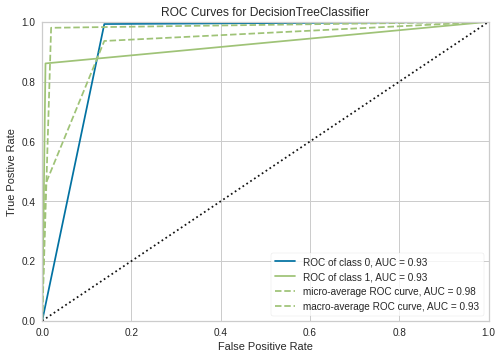

In [29]:
# AUC-ROC plot
classification.plot_model(classification_dt, plot = 'auc')

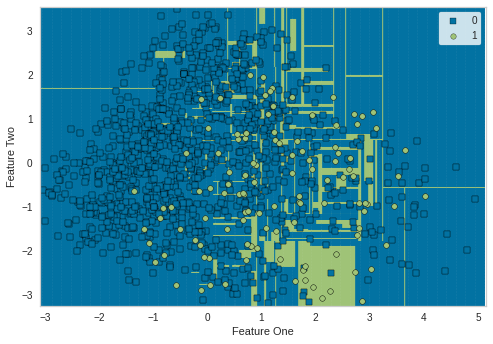

In [28]:
# Decision Boundary
classification.plot_model(classification_dt, plot = 'boundary')

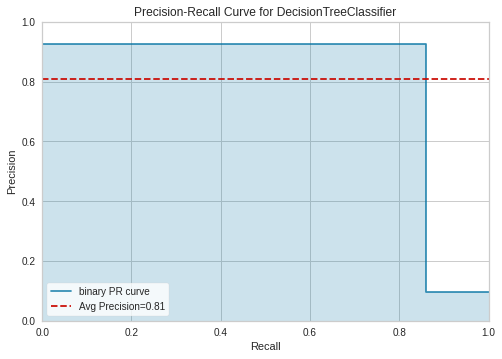

In [30]:
# Precision Recall Curve
classification.plot_model(classification_dt, plot = 'pr')

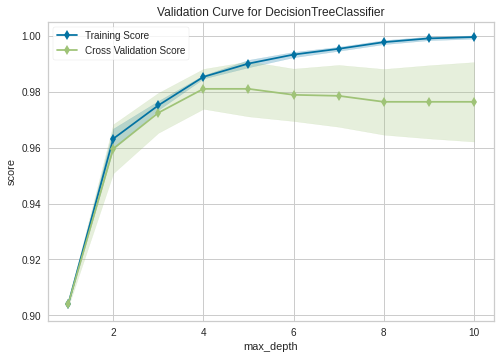

In [31]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

In [32]:
# evaluate model
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

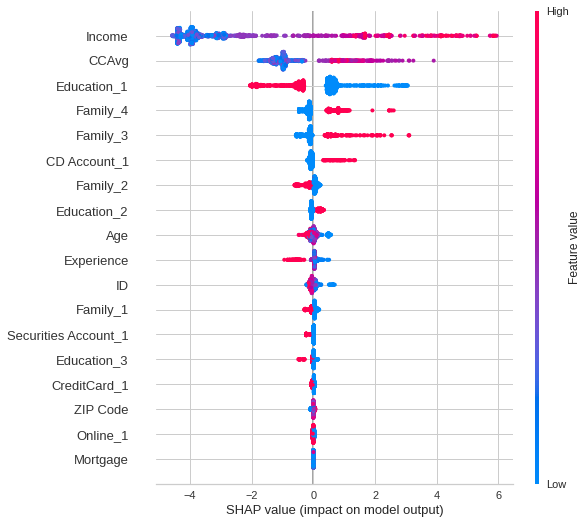

In [33]:
# interpret_model: SHAP
classification.interpret_model(classification_xgb)

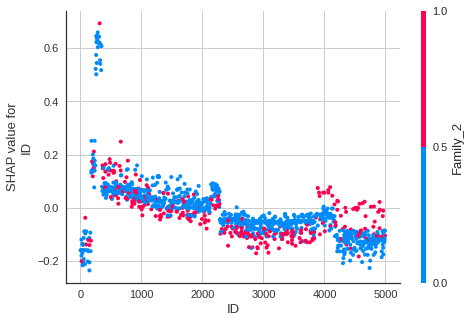

In [34]:
# interpret model : Correlation
classification.interpret_model(classification_xgb,plot='correlation')

In [35]:

# read the test data
test_data_classification = pd.read_csv('/content/loan_test_data.csv')
# make predictions
predictions = classification.predict_model(classification_dt, data=test_data_classification)
# view the predictions
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,0.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,0.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,0.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,0.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,0.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,0.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,0.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,0.0


In [38]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_true= predictions['Personal Loan'], y_pred= predictions['Label'])

0.985

In [39]:
recall_score(y_true= predictions['Personal Loan'], y_pred= predictions['Label'])

0.90625

In [40]:
# save the model
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Succesfully Saved


In [41]:
# load model
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Sucessfully Loaded
